In [1]:
import numpy as np

In [2]:
def pivoting_matrix(A):
    assert len(A.shape) == 2 and A.shape[0] == A.shape[1], 'Matrix must be square'
    n = A.shape[0]
    A = A.copy()
    P = np.identity(n)

    for j in range(n):
        max_i, max_j = max(( (i,j) for i in range(j,n) ) , key=lambda pos: abs(A[pos[0],pos[1]]))
        A[[j, max_i]] = A[[max_i, j]]
        P[[j, max_i]] = P[[max_i, j]]

    return P

def LU_decomposition(A):
    assert len(A.shape) == 2 and A.shape[0] == A.shape[1], 'Coefficient matrix must be square'
    L = np.zeros(A.shape)
    U = np.zeros(A.shape)
    n = A.shape[0]
    
    for m in range(n):
        for j in range(m, n):
            U[m,j] = A[m,j] - sum(L[m,k] * U[k,j] for k in range(m))

        L[m,m] = 1
        for i in range(m+1, n):
            L[i,m] = (A[i,m] - sum(L[i,k] * U[k,m] for k in range(m))) / U[m,m]

    return L, U

def solve_lower_system(A, b):
    assert len(A.shape) == 2 and A.shape[0] == A.shape[1], 'Matrix must be square'
    n = A.shape[0]
    x = np.zeros((n))

    for i in range(n):
        x[i] = (b.flat[i] - sum(A[i,j] * x[j] for j in range(i))) / A[i,i]

    return x

def solve_upper_system(A, b):
    assert len(A.shape) == 2 and A.shape[0] == A.shape[1], 'Matrix must be square'
    n = A.shape[0]
    x = np.zeros((n))

    for i in range(n-1, -1, -1):
        x[i] = (b[i] - sum(A[i,j] * x[j] for j in range(i+1, n))) / A[i,i]

    return x

def solve_system(A, b, pivoting=True):
    assert len(A.shape) == 2 and A.shape[0] == A.shape[1], 'Matrix must be square'
    assert len(A.shape) == 2 and A.shape[0] == A.shape[1], 'Coefficient matrix must be square'

    if pivoting:
        P = pivoting_matrix(A)
        L, U = LU_decomposition(np.matmul(P, A))
        y = solve_lower_system(L, np.matmul(P, b))
        return solve_upper_system(U, y)

    L, U = LU_decomposition(A)
    y = solve_lower_system(L, b)
    return solve_upper_system(U, y)

In [89]:
def minimum_squares_coefficientes(points, functions, linearizing_function=None):
    if linearizing_function == None:
        linearizing_function = lambda y: y

    n = len(points)
    m = len(functions)
    phi = np.empty((n,m))
    y = np.empty((n,1))
    for i in range(n):
        y[i][0] = linearizing_function(points[i][1])

    for i,j in np.ndindex(phi.shape):
        phi[i][j] = functions[j](points[i][0])

    return solve_system(np.matmul(phi.T, phi), np.matmul(phi.T, y))

In [103]:
points = [ (2.,6.),(3.4,4.3),(0.,9.9),(-3.4,4.3),(-2.,6.) ]
g = [ lambda x: 1, lambda x: x, lambda x: x*x ]

coef = minimum_squares_coefficientes(points,g)
print(coef[2])

-0.40175675757594126


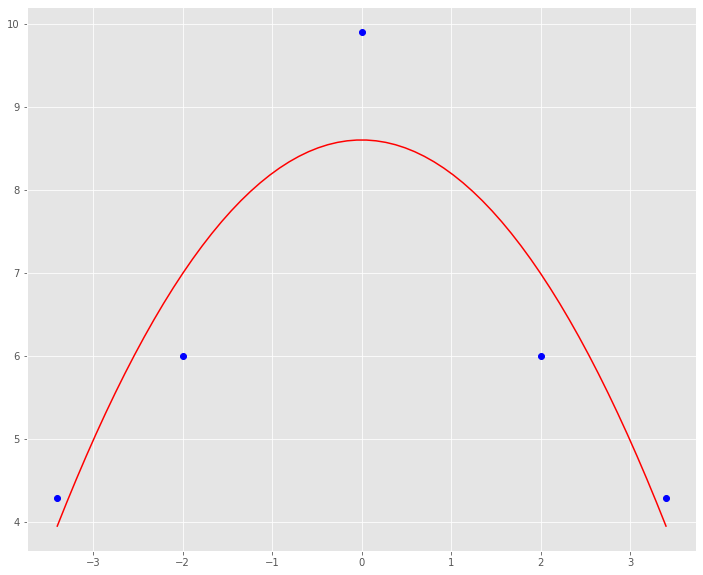

In [105]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(12,10))

x_points = np.linspace(min([p[0] for p in points]), max([p[0] for p in points]), 64)
y_points = np.zeros_like(x_points)
for coefficient, func in zip(coef, g):
    for i in range(x_points.shape[0]):
        y_points[i] += coefficient * func(x_points[i])

plt.plot([p[0] for p in points], [p[1] for p in points], 'bo')
plt.plot(x_points, y_points, 'r-')
plt.show()